### Learning the concepts of Linear Regression with one Varriable(Feature).

## Step 1: Import Libraries and Define Dummy Data

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style 
import plotly.graph_objects as go
import plotly.io as pio
from ipywidgets import interact


plt.style.use('seaborn-v0_8-darkgrid')


#Defined data for Size (sqft) and Price (1000s of dollars), dummy data form gen AI
X_train = np.array([1500, 1600, 1700, 1750, 1800, 1900, 2000, 2100, 2150, 2200,
                    2250, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100])
y_train = np.array([232, 250, 255, 262, 280, 300, 320, 330, 345, 360,
                    365, 370, 385, 400, 415, 430, 445, 460, 475, 490])

# Convert to DataFrame for better visualization
data = pd.DataFrame({
    'Size (sqft)': X_train,
    'Price (1000s of dollars)': y_train
})

# Display the data in tabular format
data.head(10)


,Size (sqft),Price (1000s of dollars)
0,1500,232
1,1600,250
2,1700,255
3,1750,262
4,1800,280
5,1900,300
6,2000,320
7,2100,330
8,2150,345
9,2200,360


Visualize the data

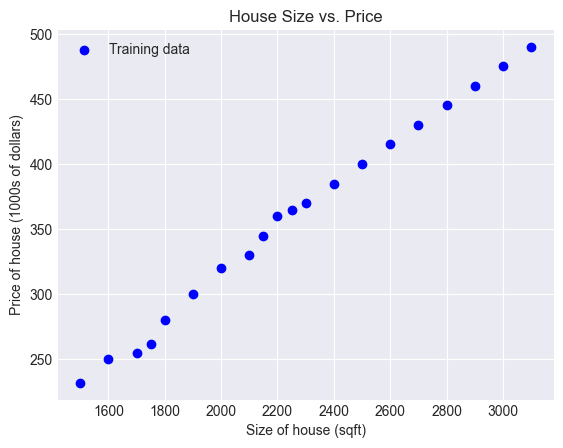

In [2]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.xlabel("Size of house (sqft)")
plt.ylabel("Price of house (1000s of dollars)")
plt.title("House Size vs. Price")
plt.legend()
plt.show()

## Step 2: Define the Linear Model

The model is a simple linear regression:

$$ f_{w,b} (x) = wx + b $$

where:
- $ w $ is the weight
- $ b $ is the bias
- $ x $ is the input variable

The aim is to find the best fit of *w* and *b*, that fits the data best. "Best fit" is the line that minimizes the error between the model's prediction and that of the actual data point (training data). 

## Step 3: Define the Cost Function

To find the diffrence in error we use the cost error which is the:

$$ \text{cost error} = \hat{y} - y $$

This represents the difference between the predicted value of the function and the actual value. To avoid any negative values, we square this difference:

$$ \text{cost error} = (\hat{y} - y)^2 $$

Next, we find the sum of all these cost errors for each instance in the dataset. If there are ( m ) data points, we find the summation as follows:

$$ \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 $$

and since *y* is the prediction value, we can re-express this equation of the Cost function as: 

$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)^2 $$

where:
- $ m $ is the number of training examples
- $ f_{w,b}(x^{(i)}) $ is the predicted value for the $ i $-th training example
- $ y^{(i)} $ is the actual value for the $ i $-th training example

The code implementation of the cost function is as follows

In [3]:
def compute_cost(X, y, w, b): # input parameters, X is the X_train, y is the y_train, w
    m = X.shape[0] #finding the number of data points in the data set
    cost = 0
    for i in range(m): # 0 to (m-1)
        f_wb = w * X[i] + b  # Model prediction
        cost += (f_wb - y[i]) ** 2 ##summation of all values
    cost /= (2 * m) ## after loop is completed the final value of cost is divided by 2m
    return cost ##to return the cost function value of J(w,b)


So far, we have gotten this:

In linear regression, our goal is to find the optimal values for $ w $ (weight) and $ b $ (bias) such that our model:

$$ f_{w,b}(x) = wx + b $$

minimizes the difference between the predicted values and the actual values in the training data. To measure this difference, we use the cost function:

$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)^2 $$

where:

- $ m $ is the number of training examples,
- $ f_{w,b}(x^{(i)}) $ is the predicted output for example $ i $,
- $ y^{(i)} $ is the actual output for example $ i $.

The cost function $ J(w, b) $ calculates the average squared error across all training dataset, giving us a measure of how well our line fits the data. Our objective is to minimize $ J(w, b) $, which requires us to iteratively adjust $ w $ and $ b $ until we reach values that give us the lowest possible cost, and to do this we have to understand the Gradient Descent.


## Step 4: Understanding the Gradient Descent

### The Gradient Descent Process

Gradient descent helps us find the values of $w$ and $b$ that minimize $J(w, b)$. Here’s a high-level overview:

1. **Initialize** $w$ and $b$ with some initial guesses (usually 0).
2. **Compute the gradient** of $J(w, b)$ with respect to $w$ and $b$ to find the slope of the cost function at the current values of $w$ and $b$.
3. **Update** $w$ and $b$ by moving them in the opposite direction of the gradient (downhill) to reduce the cost.
4. **Repeat** steps 2 and 3 until the values of $w$ and $b$ converge to values that minimize $J(w, b)$.


### 2D Explanation: Cost Function as a Function of $ w $ (Fixing $ b = 0 $)

Let's first simplify by fixing $ b = 0 $ and seeing how the cost function behaves as a function of $ w $ alone.

#### Step 1: Cost Function by $ w $ Only
If $ b = 0 $, our cost function becomes:

$$  J(w) = \frac{1}{2m} \sum_{i=1}^{m} (w \cdot x^{(i)} - y^{(i)})^2  $$

#### Visualize Cost Function by $ w $
We can plot $ J(w) $ against $ w $ to see how changing $ w $ alone affects the cost.


The shape of this curve shows that there is a specific $ w $ value where $ J(w) $ is minimized. Gradient descent helps us find this optimal $ w $ by moving in the direction of the negative gradient.


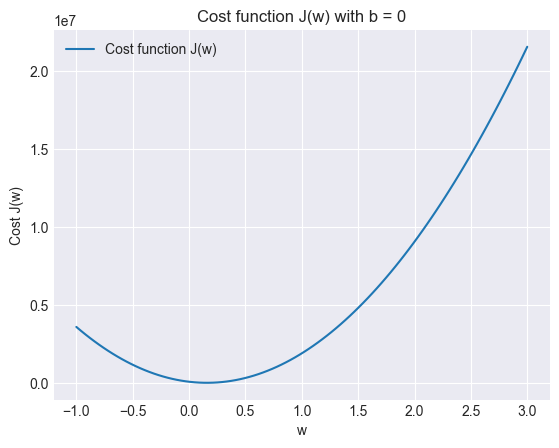

In [4]:
# Define the range of w values
w_values = np.linspace(-1, 3, 100)
cost_values = [compute_cost(X_train, y_train, w, 0) for w in w_values]  # Fix b = 0

# Plot J(w) vs. w
plt.plot(w_values, cost_values, label='Cost function J(w)')
plt.xlabel("w")
plt.ylabel("Cost J(w)")
plt.title("Cost function J(w) with b = 0")
plt.legend()
plt.show()

## 2D Explanation: Cost Function as a Function of $ b $ (Fixing $ w = 0 $)

Now let’s see what happens when we fix $ w = 0 $ and treat $ J(b) $ as a function of $ b $ only.

### Step 2: Cost Function by $ b $ Only
If $ w = 0 $, our cost function becomes:

$$ J(b) = \frac{1}{2m} \sum_{i=1}^{m} (b - y^{(i)})^2 $$

### Visualize Cost Function by $ b $
This plot shows the cost as a function of $ b $ only, with $ w $ fixed at zero. Again, we can see there’s a minimum value for $ b $ that minimizes the cost. Gradient descent will also help us find this optimal $ b $ value.


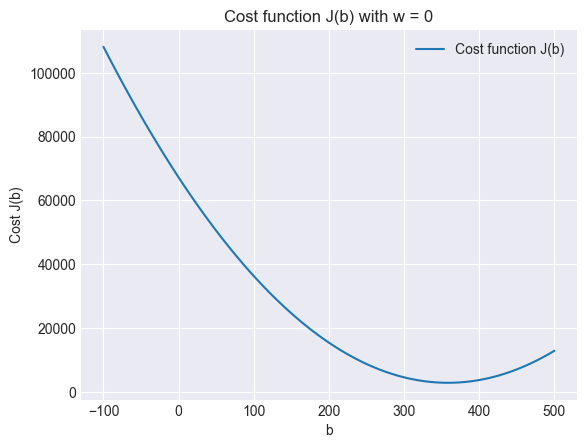

In [5]:
# Define the range of b values
b_values = np.linspace(-100, 500, 100)
cost_values = [compute_cost(X_train, y_train, 0, b) for b in b_values]  # Fix w = 0

# Plot J(b) vs. b
plt.plot(b_values, cost_values, label='Cost function J(b)')
plt.xlabel("b")
plt.ylabel("Cost J(b)")
plt.title("Cost function J(b) with w = 0")
plt.legend()
plt.show()


## Full 3D View of the Cost Function $ J(w, b) $

When we allow both $ w $ and $ b $ to vary, the cost function becomes a surface in three dimensions:

$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} ((w \cdot x^{(i)} + b) - y^{(i)})^2 $$

To minimize $ J(w, b) $, we need to adjust both $ w $ and $ b $ simultaneously.

### Visualizing the 3D Cost Function
We can plot the 3D surface of $ J(w, b) $ as a function of both $ w $ and $ b $ and use contours to show the level curves.


In [6]:
# Generate grid for w and b values
w_range = np.linspace(-0.1, 0.3, 50)
b_range = np.linspace(-100, 500, 50)
W, B = np.meshgrid(w_range, b_range)
J_vals = np.zeros(W.shape)

# Define cost function
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * X[i] + b
        cost += (f_wb - y[i]) ** 2
    return cost / (2 * m)

# Compute cost for each point on the grid
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(X_train, y_train, W[i, j], B[i, j])

# Create interactive 3D surface plot with Plotly
fig = go.Figure(data=[go.Surface(z=J_vals, x=W, y=B, colorscale='Viridis')])
fig.update_layout(scene=dict(
                    xaxis_title='w',
                    yaxis_title='b',
                    zaxis_title='Cost J(w, b)'),
                  title="Interactive 3D Plot of Cost Function J(w, b)")

fig.show(renderer="browser")


## Gradient Descent: Updating $ w $ and $ b $

The gradient descent update formulas help us take small steps in the direction that minimizes $ J(w, b) $.

### Compute the Gradients
The partial derivatives of $ J(w, b) $ with respect to $ w $ and $ b $ are:

For $ w $:
$$ \frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} ((w \cdot x^{(i)} + b) - y^{(i)}) x^{(i)} $$

For $ b $:
$$ \frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} ((w \cdot x^{(i)} + b) - y^{(i)}) $$

Note: The factor $ \frac{1}{2m} $ in the cost function simplifies to $ \frac{1}{m} $ in the gradient because the derivative of $ x^2 $ is $ 2x $, canceling out the 2.

### Update $ w $ and $ b $ Using Temporary Variables
$$ \text{temp\_w} = w - \alpha \cdot \frac{\partial J(w, b)}{\partial w} $$
$$ \text{temp\_b} = b - \alpha \cdot \frac{\partial J(w, b)}{\partial b} $$

Here, `temp_w` and `temp_b` hold the updated values before assigning them back to $ w $ and $ b $, ensuring the calculations for each are based on the same current values.

Repeat until $ J(w, b) $ reaches its minimum.


#### The PseudoCode

------------Initialize parameters

w, b = initial_guess()

alpha = learning_rate

----------Repeat until convergence

for i in range(num_iterations):

    # Calculate gradients

    dj_dw, dj_db = compute_gradient(X, y, w, b)


    # Update with temp values

    temp_w = w - alpha * dj_dw

    temp_b = b - alpha * dj_db


    # Assign updated values back to w and b
    
    w = temp_w

    b = temp_b


## Understanding the Learning Rate $ \alpha $ in Gradient Descent

The learning rate $ \alpha $ controls the size of each step taken toward the minimum of the cost function. Here’s how it works and why it’s crucial:

### Step Size Control
The learning rate determines the size of the updates to $ w $ and $ b $ in each iteration. The formula for updating these parameters is:

$$ \text{temp\_w} = w - \alpha \cdot \frac{\partial J(w, b)}{\partial w} $$

$$ \text{temp\_b} = b - \alpha \cdot \frac{\partial J(w, b)}{\partial b} $$

If $ \alpha $ is too large, gradient descent may overshoot the minimum, oscillating or even diverging. If $ \alpha $ is too small, gradient descent converges slowly, requiring many iterations to reach the minimum.

### Tuning $ \alpha $
Selecting the optimal learning rate is essential:

- A large learning rate might lead to faster convergence, but it risks instability.
- A small learning rate is safer, but it can make the training process slow.

### Adaptive Learning Rates
Some advanced gradient descent algorithms adjust the learning rate automatically based on the gradient. For example, algorithms like Adam or RMSprop dynamically change the learning rate to improve convergence.


In [7]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * X[i] + b
        dj_dw += (f_wb - y[i]) * X[i]
        dj_db += (f_wb - y[i])
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db


### Step 5: Running Gradient Descent

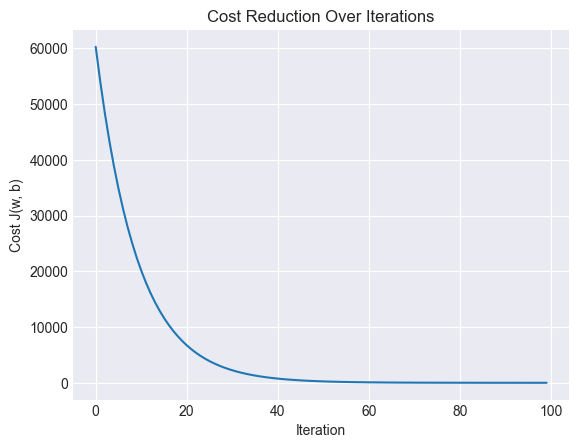

In [8]:

def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    w = w_init
    b = b_init
    J_history = []
    w_history = []
    b_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        
        # Update w and b
        temp_w = w - alpha * dj_dw
        temp_b = b - alpha * dj_db
        
        # Assign the updated values back to w and b
        w = temp_w
        b = temp_b

        # Save cost, w, and b history for analysis
        J_history.append(compute_cost(X, y, w, b))
        w_history.append(w)
        b_history.append(b)
        
    return w, b, J_history, w_history, b_history

# Initialize parameters and run gradient descent
w_init = 0
b_init = 0
alpha = 0.00000001
num_iters = 100

w_final, b_final, J_history, w_history, b_history = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iters)

# Plot the cost function history over iterations
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w, b)")
plt.title("Cost Reduction Over Iterations")
plt.show()


### Step 6: Visualizing Gradient Descent and Contour Plots

In [9]:
# Gradient descent path data (assuming w_history and b_history are available)
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * X[i] + b
        dj_dw += (f_wb - y[i]) * X[i]
        dj_db += (f_wb - y[i])
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    w = w_init
    b = b_init
    w_history = [w]
    b_history = [b]

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        
        # Update w and b
        temp_w = w - alpha * dj_dw
        temp_b = b - alpha * dj_db
        
        # Assign the updated values back to w and b
        w, b = temp_w, temp_b

        # Record history of w and b
        w_history.append(w)
        b_history.append(b)
        
    return w, b, w_history, b_history

# Initialize gradient descent and calculate path
w_init = 0
b_init = 0
alpha = 0.00000001
num_iters = 100
_, _, w_history, b_history = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iters)

# Create contour plot
fig = go.Figure()

# Add contour of J(w, b)
fig.add_trace(go.Contour(
    z=J_vals,
    x=w_range,
    y=b_range,
    contours_coloring='heatmap',
    colorbar=dict(title="Cost"),
    colorscale='Viridis'
))

# Overlay the gradient descent path
fig.add_trace(go.Scatter(
    x=w_history,
    y=b_history,
    mode="markers+lines",
    marker=dict(color='red', size=6),
    name="Gradient Descent Path"
))

# Configure layout
fig.update_layout(
    title="Interactive 2D Contour Plot of Cost Function with Gradient Descent Path",
    xaxis_title="w",
    yaxis_title="b"
)

fig.show(renderer="browser")


In [10]:
# Final values of w and b from gradient descent
w_final = w_history[-1]  # or the optimal value of w from the training
b_final = b_history[-1]  # or the optimal value of b from the training

# Define the prediction function
def predict_price(size):
    price = w_final * size + b_final
    return price

# Create an interactive slider for house size
@interact
def interactive_prediction(size=(1000, 3500, 100)):
    # Calculate predicted price
    predicted_price = predict_price(size)

    # Plot data points and the regression line
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X_train, y=y_train, mode='markers', name='Training data'))
    fig.add_trace(go.Scatter(x=[min(X_train), max(X_train)], 
                             y=[predict_price(min(X_train)), predict_price(max(X_train))],
                             mode='lines', name='Regression line'))

    # Add the prediction point
    fig.add_trace(go.Scatter(x=[size], y=[predicted_price], mode='markers', 
                             marker=dict(color='red', size=10),
                             name=f"Predicted price for {size} sqft: {predicted_price:.2f}"))

    # Update layout
    fig.update_layout(
        title="House Price Prediction with Best Fit Line",
        xaxis_title="Size of house (sqft)",
        yaxis_title="Price of house (1000s of dollars)"
    )
    
    fig.show(renderer="browser")
    print(f"Predicted price for a house size of {size} sqft: {predicted_price:.2f} (in 1000s of dollars)")


interactive(children=(IntSlider(value=2200, description='size', max=3500, min=1000, step=100), Output()), _dom…

### Test

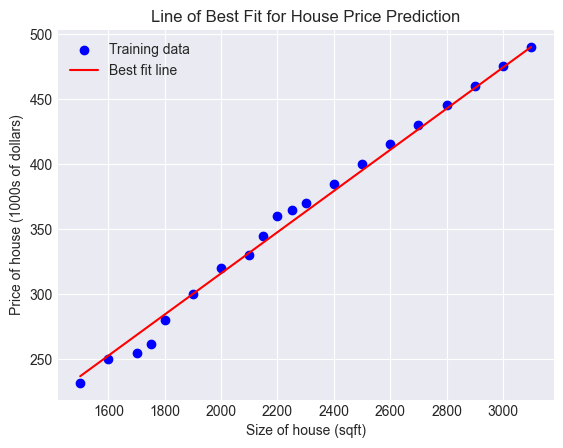

The final cost J(w, b) with the best-fit line is: 21.9273


In [11]:
# Use final w and b values
w_final = w_history[-1]
b_final = b_history[-1]

# Plot data points and the line of best fit
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, w_final * X_train + b_final, color='red', label='Best fit line')
plt.xlabel("Size of house (sqft)")
plt.ylabel("Price of house (1000s of dollars)")
plt.title("Line of Best Fit for House Price Prediction")
plt.legend()
plt.show()

final_cost = compute_cost(X_train, y_train, w_final, b_final)
print(f"The final cost J(w, b) with the best-fit line is: {final_cost:.4f}")
